In [1]:
# import packages and functions from py-file
from data_validation.data_validation import *
save_2_file = True

the correlation between v_blf and v_db_interp is: 
 [[1.         0.99247021]
 [0.99247021 1.        ]]


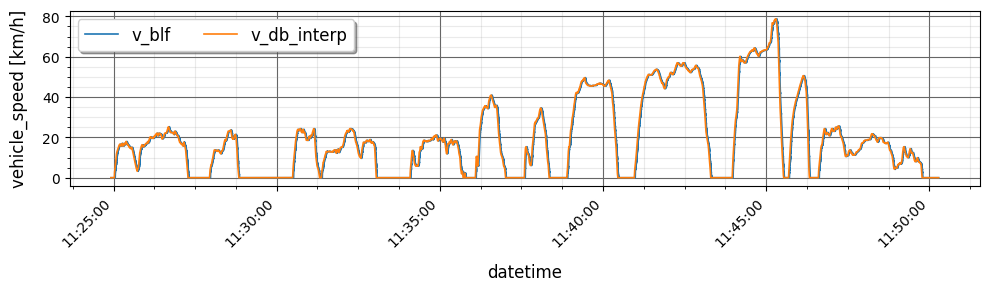

the correlation between v_blf and v_db_interp is: 
 [[1.         0.98451555]
 [0.98451555 1.        ]]


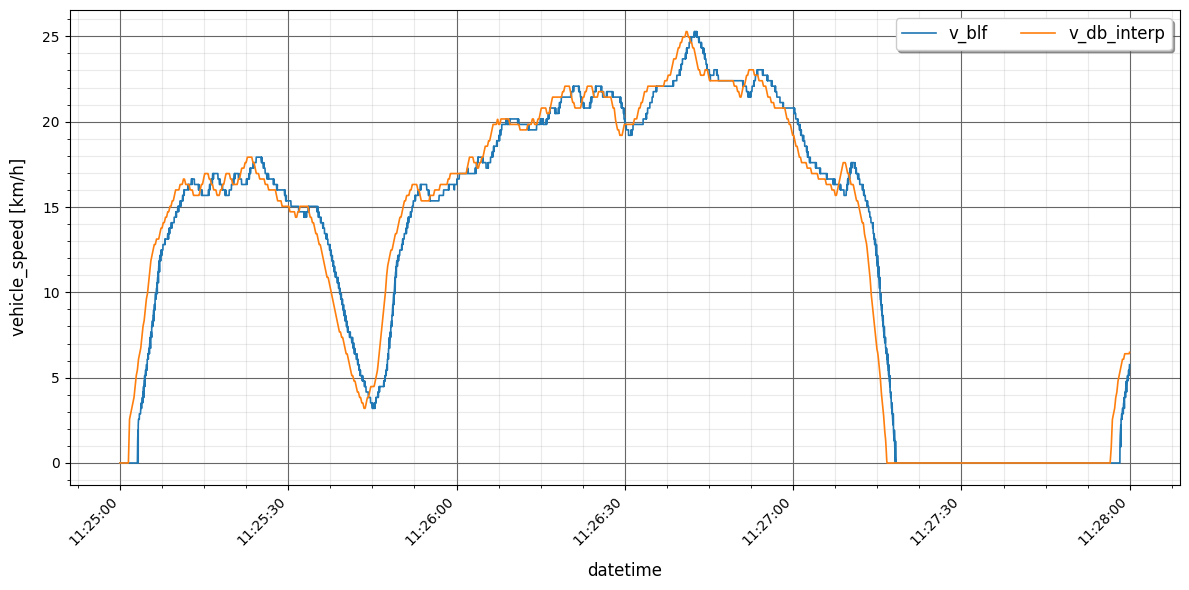

In [2]:
# read data
# and print info from dataframe
df_vgl = pd.read_parquet('data_validation/data.gzip')
# print(df_vgl.info())

# extract values for interpolation
# and interpolate with numpy in a new dataframe called df
# plot data
v_db_origin = df_vgl[['v_db', 'timestamp']].dropna()
v_blf_origin = df_vgl[['v_blf', 'timestamp']].dropna()
df = v_blf_origin
df['v_db_interp'] = np.interp(v_blf_origin.timestamp, v_db_origin.timestamp, v_db_origin.v_db)
# print(df.info())

print('the correlation between v_blf and v_db_interp is: \n {corr_matrix}'.format(corr_matrix= corr_matrix(df.v_blf, df.v_db_interp)))
# plot_dataframe(df[['v_blf', 'v_db_interp']].between_time('11:25', '11:25:30'))
plot_dataframe(df[['v_blf', 'v_db_interp']], name='speed_comparison_interpolated', save=save_2_file, figsize=(10,3))
# zoom in to show diff
time_zoom = ('11:25', '11:28')
print('the correlation between v_blf and v_db_interp is: \n {corr_matrix}'.format(corr_matrix= corr_matrix(df.v_blf.between_time(*time_zoom), df.v_db_interp.between_time(*time_zoom))))
plot_dataframe(df[['v_blf', 'v_db_interp']].between_time(*time_zoom), name='speed_comparison_interpolated_zoom', save=save_2_file)

the correlation between v_blf and v_db_interp is: 
 [[1.         0.98451555]
 [0.98451555 1.        ]]


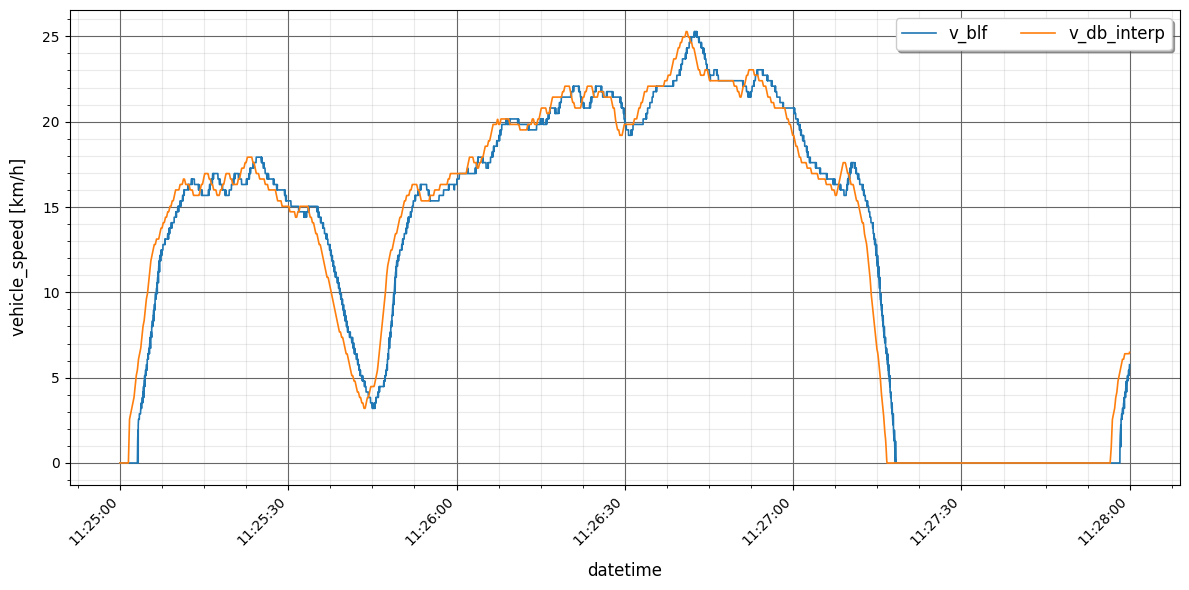

In [3]:
# time_zoom = '11:25:15', '11:27:15'
print('the correlation between v_blf and v_db_interp is: \n {corr_matrix}'.format(corr_matrix= corr_matrix(df.v_blf.between_time(*time_zoom), df.v_db_interp.between_time(*time_zoom))))
plot_dataframe(df[['v_blf', 'v_db_interp']].between_time(*time_zoom))

time shift is: 	 1.5621079358353511
the correlation between v_blf and v_db_interp_shifted is: 
 [[1.         0.99992495]
 [0.99992495 1.        ]]


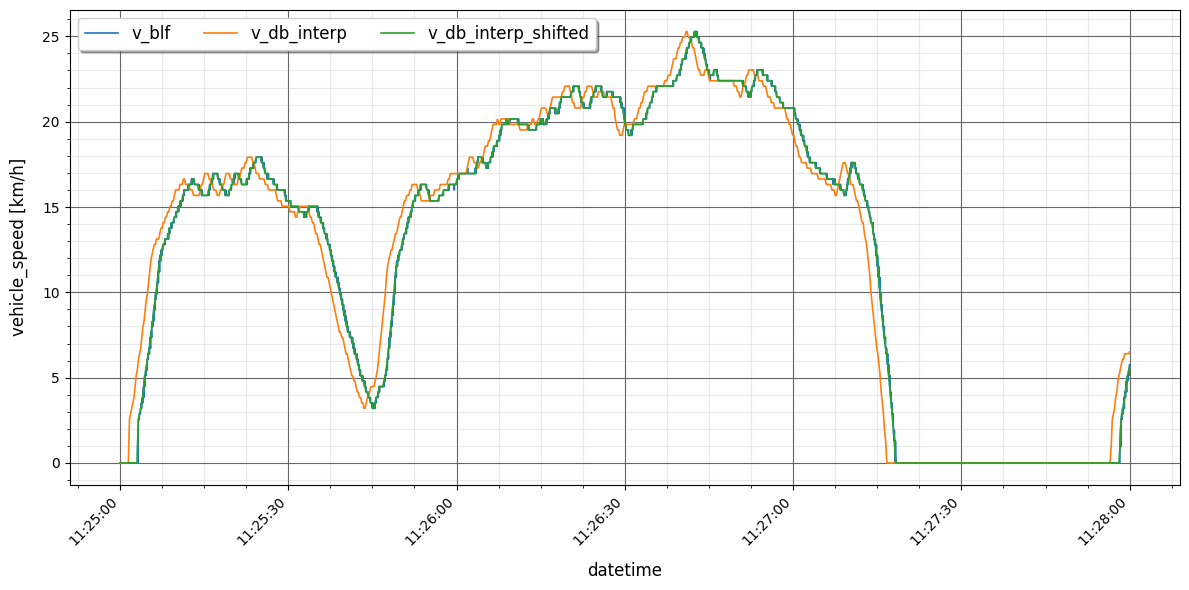

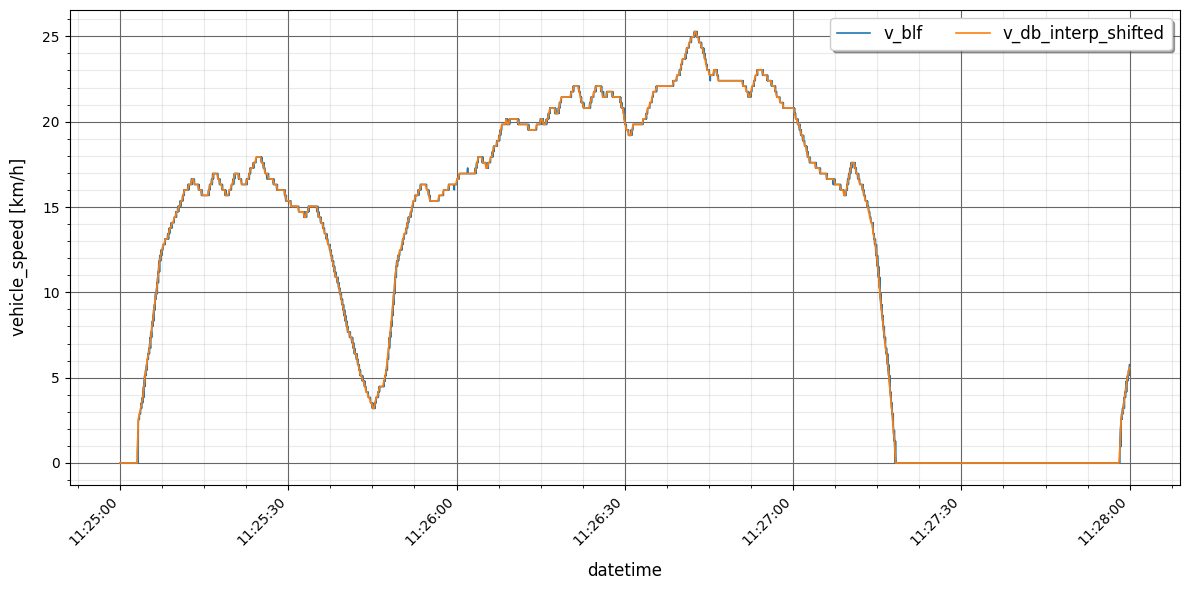

In [4]:
# calc time shift from cross validation
df_shifted = shift_dataframe(df, 'v_db_interp', calc_time_shift_for_dataframe(df[['v_blf', 'v_db_interp']]))
print('the correlation between v_blf and v_db_interp_shifted is: \n {corr_matrix}'.format(corr_matrix= corr_matrix(df_shifted.v_blf.between_time(*time_zoom), df_shifted.v_db_interp_shifted.between_time(*time_zoom))))
plot_dataframe(df_shifted[['v_blf', 'v_db_interp', 'v_db_interp_shifted']].between_time(*time_zoom))
plot_dataframe(df_shifted[['v_blf', 'v_db_interp_shifted']].between_time(*time_zoom), name='speed_comparison_correlation_zoom', save=save_2_file)

the correlation between v_blf and v_db_interp_shifted is: 
 [[ 1. nan]
 [nan nan]]


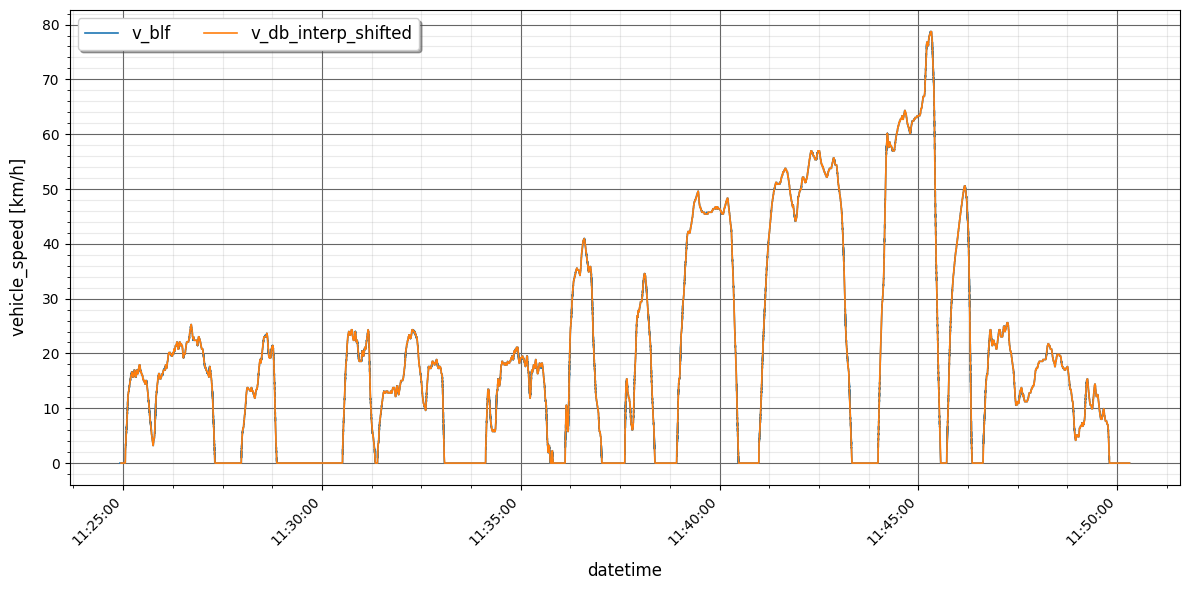

In [5]:
print('the correlation between v_blf and v_db_interp_shifted is: \n {corr_matrix}'.format(corr_matrix=corr_matrix(df_shifted.v_blf, df_shifted.v_db_interp_shifted)))
plot_dataframe(df_shifted[['v_blf', 'v_db_interp_shifted']])

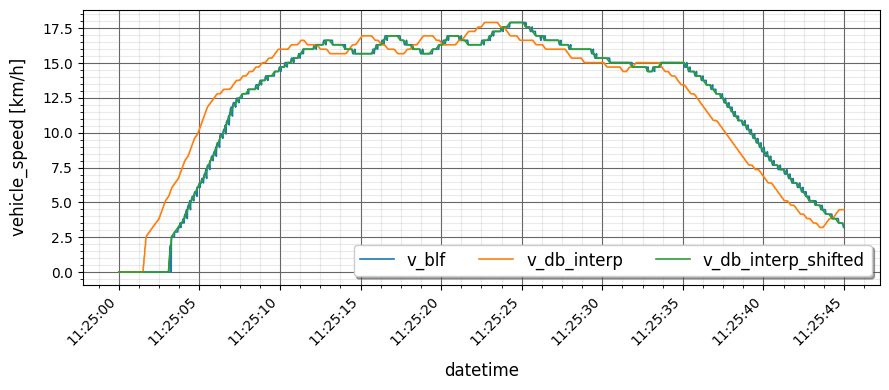

the correlation between v_blf and v_db_interp is: 
 [[1.         0.94651433]
 [0.94651433 1.        ]]
the correlation between v_blf and v_db_interp_shifted is: 
 [[1.         0.99972635]
 [0.99972635 1.        ]]


,v_blf,timestamp,v_db_interp,v_db_interp_shifted
2019-11-06 11:24:55.142766,0.0,1.573039e+09,0.0,NaN
2019-11-06 11:24:55.192991,0.0,1.573039e+09,0.0,NaN
2019-11-06 11:24:55.242927,0.0,1.573039e+09,0.0,NaN
2019-11-06 11:24:55.249230,0.0,1.573039e+09,0.0,NaN
2019-11-06 11:24:55.293412,0.0,1.573039e+09,0.0,NaN


In [6]:
time_zoom = '11:25', '11:25:45'
plot_dataframe(df_shifted[['v_blf', 'v_db_interp', 'v_db_interp_shifted']].between_time(*time_zoom), figsize=(9,4), save=save_2_file, name='speed_comparison_correlation_zoom')
print('the correlation between v_blf and v_db_interp is: \n {corr_matrix}'.format(corr_matrix= corr_matrix(df.v_blf.between_time(*time_zoom), df.v_db_interp.between_time(*time_zoom))))
print('the correlation between v_blf and v_db_interp_shifted is: \n {corr_matrix}'.format(corr_matrix= corr_matrix(df_shifted.v_blf.between_time(*time_zoom), df_shifted.v_db_interp_shifted.between_time(*time_zoom))))
df_shifted.head()

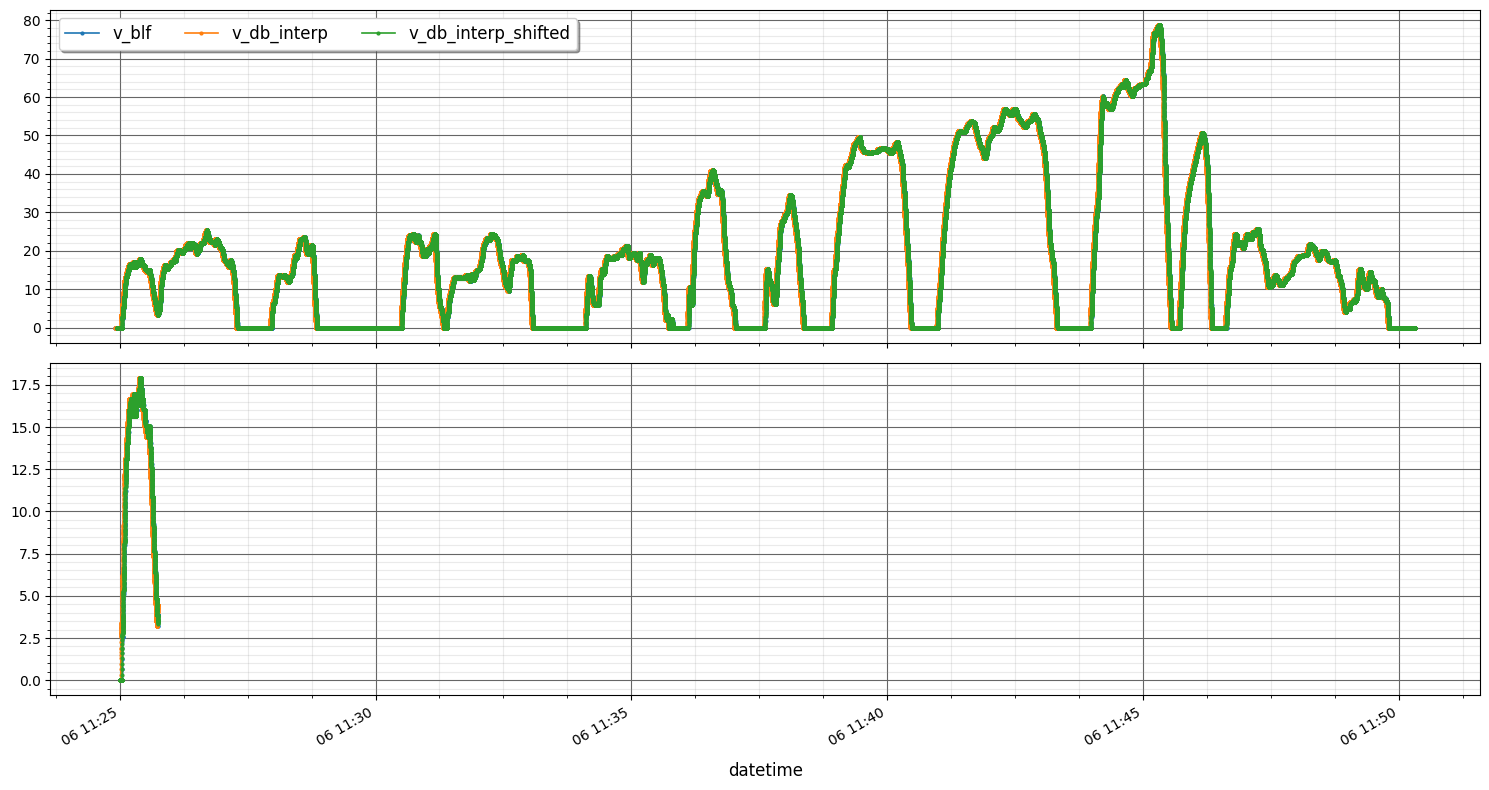

In [7]:
df1 = df_shifted.drop('timestamp', axis=1)
df2 = df_shifted.between_time(*time_zoom).drop('timestamp', axis=1)
plot_dataframes([df1, df2], x_label='datetime', y_labels=['', ''])